# Daniel 11 Research

### The TF prelude...

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [3]:
A = use('bhsa', hoist=globals())

	connecting to online GitHub repo annotation/app-bhsa ... connected
Using TF-app in C:\Users\Oliver Glanz/text-fabric-data/annotation/app-bhsa/code:
	rv1.2=#5fdf1778d51d938bfe80b37b415e36618e50190c (latest release)
	connecting to online GitHub repo etcbc/bhsa ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/bhsa/tf/c:
	rv1.6 (latest release)
	connecting to online GitHub repo etcbc/phono ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/phono/tf/c:
	r1.2 (latest release)
	connecting to online GitHub repo etcbc/parallels ... connected
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/parallels/tf/c:
	r1.2 (latest release)
   |     0.00s No structure info in otext, the structure part of the T-API cannot be used


# Dan 11:1
## Linguistic Challenges
### clause no01 - issue01
#### unexpected congruence between personal pronoun and pronominal suffix attached to predicate complement
There is an unexpected congruence between the personal pronoun (`prps`) as subject and the subject suffix (`prs`) of the predicate complement (`PreC`). Both are 1sgC.
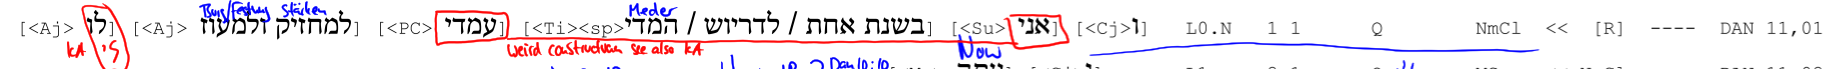

In the following query I seek to find other cases in which such a congruence takes place. 

In [53]:
CongruenceOfSubjectandPreCSuffix='''
clause
    phrase function=Subj
        w1:word sp=prps ps=p1|p2
    phrase function=PreC
        w2:word prs_ps=p1|p2|p3
w1 .ps=prs_ps. w2
'''
CongruenceOfSubjectandPreCSuffix  = A.search(CongruenceOfSubjectandPreCSuffix)
A.table(CongruenceOfSubjectandPreCSuffix, start=1, end=12, condensed=True)

  3.45s 12 results


#### Results and Questions
- As can be seen the case in Dan 11:1 is exceptional and does nowhere else appear. The other 11 cases do not count as the suffix does not appear on the head of the `PreC`and is either part of a prepositional phrase or a regens-rectum construction (cf. Judges 6:15). The following query shows a more restricted query that excludes prepositional phrases and regens-rectum constructions by defining that the suffixed word needs to stand at the head of the `PreC` phrase and cannot be attached to a preposition (`prep`):

In [54]:
CongruenceOfSubjectandSubjectSuffixAtPreCHead='''
clause
    p1:phrase function=Subj
        w1:word sp=prps ps=p1|p2
    p2:phrase function=PreC
        w2:word prs_ps=p1|p2|p3 sp#prep
w1 .ps=prs_ps. w2
p2 =: w2
'''
CongruenceOfSubjectandSubjectSuffixAtPreCHead  = A.search(CongruenceOfSubjectandSubjectSuffixAtPreCHead)
A.table(CongruenceOfSubjectandSubjectSuffixAtPreCHead, start=1, end=12, condensed=True)

  3.56s 1 result


n,p,verse,clause,word,phrase,phrase,word
1,Daniel 11:1,וַאֲנִי֙ בִּשְׁנַ֣ת אַחַ֔ת לְדָרְיָ֖וֶשׁ הַמָּדִ֑י עָמְדִ֛י לְמַחֲזִ֥יק וּלְמָעֹ֖וז לֹֽו׃,וַאֲנִי֙ בִּשְׁנַ֣ת אַחַ֔ת לְדָרְיָ֖וֶשׁ הַמָּדִ֑י עָמְדִ֛י לְמַחֲזִ֥יק וּלְמָעֹ֖וז לֹֽו׃,אֲנִי֙,אֲנִי֙,עָמְדִ֛י,עָמְדִ֛י


- One would expect that the the `PreC` (עֹמֶד) is actually made out of a participal form of עמד (as is done in the Syriaca: || c l עֹמֵד cf 𝔖 ||) instead of the nominal form עֹמֶד. However, the above queries also searches for participal `PreC`'s. Thus, even when changing the analysis of עֹמֶד into עֹמֵד the syntax of the first clause of Dan 11:1 would still represent an unkown grammatical construction (assuming this is classical or transitional Biblical Hebrew). While the Hebrew does not appear to make sense (at least grammatically speaking), both the Old Greek and Theodotion make sense. Theodotion renders:καὶ ἐγὼ ἐν ἔτει πρώτῳ Κύρου ἔστην εἰς κράτος καὶ ἰσχύν [Rahlfs Alternate Text](https://ref.ly/logosres/lxxsesbalt?ref=BibleLXX.Da11.1&off=2&ctx=11+1%EF%BB%BF~%CE%BA%CE%B1%CE%B9%CC%80+%CE%B5%CC%93%CE%B3%CF%89%CC%80+%CE%B5%CC%93%CE%BD+%CE%B5%CC%93%CC%81%CF%84%CE%B5%CE%B9+%CF%80%CF%81%CF%89%CC%81%CF%84%CF%89%CD%85+%CE%9A%CF%85%CC%81%CF%81%CE%BF)// "And I in the first year of Cyrus was [I] standing for power and strength."
- Insightful is the rendering in 4Q114(4Q Dan c) with עמדתי which solves the problem ("I, I was standing"). 
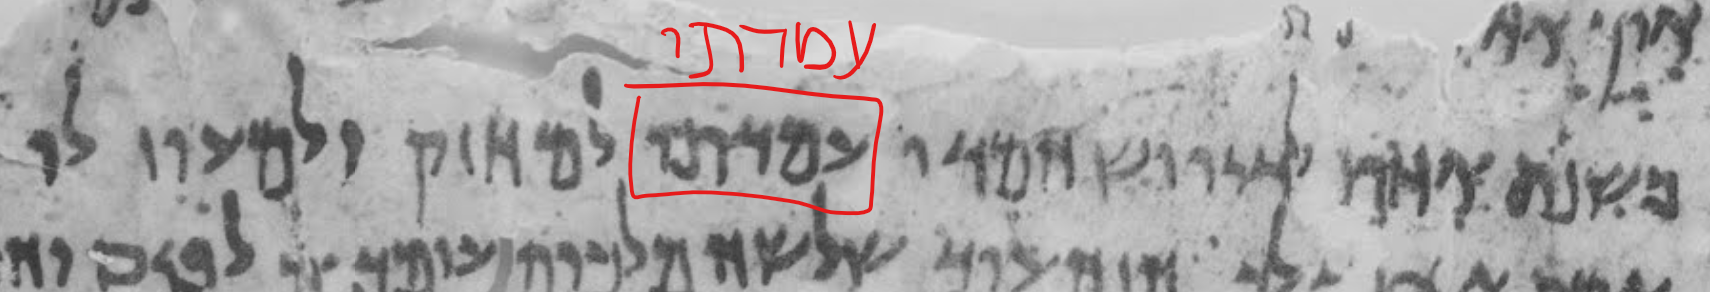
[See 4Q114 in Leon Levy Library](https://www.deadseascrolls.org.il/explore-the-archive/image/B-281137)

    The text was found with the following query on the TF-DSS-corpus:

```
Dan11_1_DSS = '''
scroll
    word book=Dan chapter=11 verse=1
'''
Dan11_1_DSS  = A.search(Dan11_1_DSS)
A.show(Dan11_1_DSS, start=1, end=48, condensed=True, fmt='layout-orig-full')
```

- As a potential translation one could suggest "I *am/was doing* my standing...". However, in classical/transitional Biblical Hebrew nominal clauses (`NmCl`) do not assume a *word of doing* but a *word of being*. This could have changed in late Biblical Hebrew, however. Research on this matter would be required...

### clause no01 - issue02
#### textcritical issue with final PP
At the end of the clause the construction rendered "for strength and for fortress for him" is accaptabel but complicated. This might explain why the Syriaca renders **d l c Ms 𝔖 לִי; cf 10,21a–a** similar to the Old Greek which renders **εἶπέν μοι ἐνισχῦσαι καὶ ἀνδρίζεσθαι** (trans: he told me to be strong and couragious; cf Dan 10:21). Theodotion omits the entire phrase. Except 4Q114(4Q Dan c), no other major witness seems to follow the MT. If the MT is followed the 3sgM suffix would refer to Darius. Howver 4Q114(4Q Dan c) renders the text of issue01 in such a way that it solves the problem.

Also the valence of <MD[ is unexpected. The following query looks for the valence of <MD[ with L-prepositions:

In [11]:
StandValenceWithL='''
clause
    p1:phrase function=Pred
        w1:word lex=<MD[ vs=qal
    p2:phrase function=Cmpl|Adj
        w2:word lex=L
        w3:word lex#PNH/
p2 =: w2
w2 <: w3
'''
StandValenceWithL  = A.search(StandValenceWithL)
A.table(StandValenceWithL, start=1, end=12, condensed=True)

  1.89s 5 results


n,p,verse,word,word,word,phrase,phrase,clause
1,1_Samuel 19:3,וַאֲנִ֨י אֵצֵ֜א וְעָמַדְתִּ֣י לְיַד־אָבִ֗י בַּשָּׂדֶה֙ אֲשֶׁ֣ר אַתָּ֣ה שָׁ֔ם וַאֲנִ֕י אֲדַבֵּ֥ר בְּךָ֖ אֶל־אָבִ֑י וְרָאִ֥יתִי מָ֖ה וְהִגַּ֥דְתִּי לָֽךְ׃ ס,עָמַדְתִּ֣י,לְ,יַד־,עָמַדְתִּ֣י,לְיַד־אָבִ֗י,וְעָמַדְתִּ֣י לְיַד־אָבִ֗י בַּשָּׂדֶה֙
2,Psalms 109:31,כִּֽי־יַ֭עֲמֹד לִימִ֣ין אֶבְיֹ֑ון לְ֝הֹושִׁ֗יעַ מִשֹּׁפְטֵ֥י נַפְשֹֽׁו׃,לִ,ימִ֣ין,יַ֭עֲמֹד,לִימִ֣ין אֶבְיֹ֑ון,כִּֽי־יַ֭עֲמֹד לִימִ֣ין אֶבְיֹ֑ון,יַ֭עֲמֹד
3,Esther 4:14,כִּ֣י אִם־הַחֲרֵ֣שׁ תַּחֲרִישִׁי֮ בָּעֵ֣ת הַזֹּאת֒ רֶ֣וַח וְהַצָּלָ֞ה יַעֲמֹ֤וד לַיְּהוּדִים֙ מִמָּקֹ֣ום אַחֵ֔ר וְאַ֥תְּ וּבֵית־אָבִ֖יךְ תֹּאבֵ֑דוּ וּמִ֣י יֹודֵ֔עַ אִם־לְעֵ֣ת כָּזֹ֔את הִגַּ֖עַתְּ לַמַּלְכֽוּת׃,יַעֲמֹ֤וד,לַיְּהוּדִים֙,יַעֲמֹ֤וד,לַ,,כִּ֣י רֶ֣וַח וְהַצָּלָ֞ה יַעֲמֹ֤וד לַיְּהוּדִים֙ מִמָּקֹ֣ום אַחֵ֔ר
4,Daniel 12:13,וְאַתָּ֖ה לֵ֣ךְ לַקֵּ֑ץ וְתָנ֛וּחַ וְתַעֲמֹ֥ד לְגֹרָלְךָ֖ לְקֵ֥ץ הַיָּמִֽין׃,תַעֲמֹ֥ד,לְגֹרָלְךָ֖,וְתַעֲמֹ֥ד לְגֹרָלְךָ֖ לְקֵ֥ץ הַיָּמִֽין׃,תַעֲמֹ֥ד,לְ,גֹרָלְךָ֖
5,Ezra 10:14,יַֽעֲמְדוּ־נָ֣א שָׂ֠רֵינוּ לְֽכָל־הַקָּהָ֞ל וְכֹ֣ל׀ אֲשֶׁ֣ר בֶּעָרֵ֗ינוּ הַהֹשִׁ֞יב נָשִׁ֤ים נָכְרִיֹּות֙ יָבֹא֙ לְעִתִּ֣ים מְזֻמָּנִ֔ים וְעִמָּהֶ֛ם זִקְנֵי־עִ֥יר וָעִ֖יר וְשֹׁפְטֶ֑יהָ עַ֠ד לְהָשִׁ֞יב חֲרֹ֤ון אַף־אֱלֹהֵ֨ינוּ֙ מִמֶּ֔נּוּ עַ֖ד לַדָּבָ֥ר הַזֶּֽה׃ פ,יַֽעֲמְדוּ־,לְֽ,כָל־,יַֽעֲמְדוּ־נָ֣א שָׂ֠רֵינוּ לְֽכָל־הַקָּהָ֞ל,יַֽעֲמְדוּ־,לְֽכָל־הַקָּהָ֞ל


#### Results and Suggestions
The query results indicate that this constrution is likely a phenomeon of transitional/late biblical Hebrew. The L-PP does not necessarily have to indicate purpose but location. Thus we could render, by following the DSS and changing עָמְדִ֛י into עמדתי: **"I stood at the stronghold and at the fotress for him"**. This would mean that the angel was assisting Darius in his fotress and/or palace (cf. Dan 10:13). 

# Dan 11:2
## Linguistic Challenges

### clause no06 
There is an unexpected phrase construction at the end of the final clause of v2:
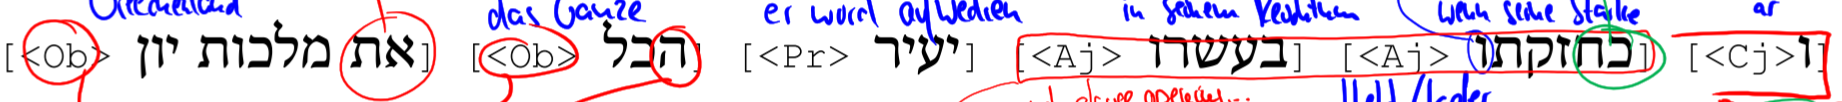
Two issues are suprising and interconnected. 
#### unexpected object phrase without nota accusativi - issue01
First, if we assume a double object construction the determined הַכֹּ֔ל should have been preceded by the object marker אֵת. Since this is not the case one is inclined to take הַכֹּ֔ל as the subject of יָעִ֣יר rendering "and the all stirred up the kingdom of Greece". Here the question needs to be answered whether can be used as subject at all, and if it appears elswhere in object position without nota accusativi when even when determined.
#### unexpected double object construction with the verb עור - issue02
Second, if הַכֹּ֔ל is taken as an object we have a double object construction in this clause, which would deviate from standard Hebrew language practice. This requires a valence investigation into עור.

The Linguistic challenge explains also the textcritical situation **b–b dub; 𝔊 pro יעיר ἐπαναστήσεται = יֵעוֹר; 2 Mss om את, 2 Mss pro eodem אֶל (sic vel עַל prb l); l יעיר שַׂר הכל?**. However, 4Q114(4Q Dan c) supports the MT:
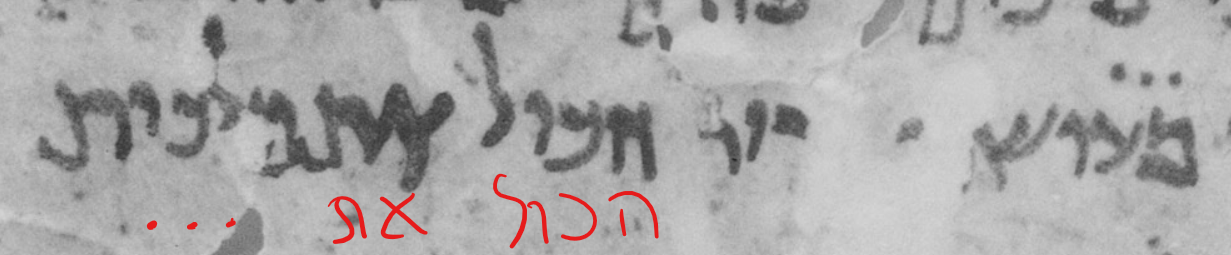

[See 4Q114 in Leon Levy Library](https://www.deadseascrolls.org.il/explore-the-archive/image/B-281137)
    
    The text was found with the following query on the TF-DSS-corpus:

```
Dan11_2_DSS = '''
scroll
    word book=Dan chapter=11 verse=2
'''
Dan11_2_DSS  = A.search(Dan11_2_DSS)
A.show(Dan11_2_DSS, start=1, end=48, condensed=True, fmt='layout-orig-full')
```


#### queries on issue01

In [55]:
HaKwlAsSubject='''
clause
    p1:phrase function=Subj
        w1:word lex=H
        w2:word lex=KL/
p1 =: w1
p1 := w2
w1 <: w2
'''
HaKwlAsSubject  = A.search(HaKwlAsSubject)
A.table(HaKwlAsSubject, start=1, end=10, condensed=True)

  2.84s 30 results


n,p,verse,phrase,word,clause,word
1,Joshua 21:45,לֹֽא־נָפַ֣ל דָּבָ֔ר מִכֹּל֙ הַדָּבָ֣ר הַטֹּ֔וב אֲשֶׁר־דִּבֶּ֥ר יְהוָ֖ה אֶל־בֵּ֣ית יִשְׂרָאֵ֑ל הַכֹּ֖ל בָּֽא׃ פ,הַכֹּ֖ל,כֹּ֖ל,הַכֹּ֖ל בָּֽא׃ פ,הַ
2,Joshua 23:14,וְהִנֵּ֨ה אָנֹכִ֤י הֹולֵךְ֙ הַיֹּ֔ום בְּדֶ֖רֶךְ כָּל־הָאָ֑רֶץ וִידַעְתֶּ֞ם בְּכָל־לְבַבְכֶ֣ם וּבְכָל־נַפְשְׁכֶ֗ם כִּ֣י לֹֽא־נָפַל֩ דָּבָ֨ר אֶחָ֜ד מִכֹּ֣ל׀ הַדְּבָרִ֣ים הַטֹּובִ֗ים אֲשֶׁ֨ר דִּבֶּ֜ר יְהוָ֤ה אֱלֹהֵיכֶם֙ עֲלֵיכֶ֔ם הַכֹּל֙ בָּ֣אוּ לָכֶ֔ם לֹֽא־נָפַ֥ל מִמֶּ֖נּוּ דָּבָ֥ר אֶחָֽד׃,הַכֹּל֙,הַ,כֹּל֙,הַכֹּל֙ בָּ֣אוּ לָכֶ֔ם
3,2_Samuel 17:3,וְאָשִׁ֥יבָה כָל־הָעָ֖ם אֵלֶ֑יךָ כְּשׁ֣וּב הַכֹּ֔ל הָאִישׁ֙ אֲשֶׁ֣ר אַתָּ֣ה מְבַקֵּ֔שׁ כָּל־הָעָ֖ם יִהְיֶ֥ה שָׁלֹֽום׃,כֹּ֔ל,הַכֹּ֔ל,כְּשׁ֣וּב הַכֹּ֔ל,הַ
4,1_Kings 6:18,וְאֶ֤רֶז אֶל־הַבַּ֨יִת֙ פְּנִ֔ימָה מִקְלַ֣עַת פְּקָעִ֔ים וּפְטוּרֵ֖י צִצִּ֑ים הַכֹּ֣ל אֶ֔רֶז אֵ֥ין אֶ֖בֶן נִרְאָֽה׃,הַכֹּ֣ל אֶ֔רֶז,הַ,הַכֹּ֣ל,כֹּ֣ל
5,1_Kings 7:33,וּמַֽעֲשֵׂה֙ הָאֹ֣ופַנִּ֔ים כְּמַעֲשֵׂ֖ה אֹופַ֣ן הַמֶּרְכָּבָ֑ה יְדֹותָ֣ם וְגַבֵּיהֶ֗ם וְחִשֻּׁקֵיהֶ֛ם וְחִשֻּׁרֵיהֶ֖ם הַכֹּ֥ל מוּצָֽק׃,הַכֹּ֥ל,הַ,הַכֹּ֥ל מוּצָֽק׃,כֹּ֥ל
6,2_Kings 24:16,וְאֵת֩ כָּל־אַנְשֵׁ֨י הַחַ֜יִל שִׁבְעַ֣ת אֲלָפִ֗ים וְהֶחָרָ֤שׁ וְהַמַּסְגֵּר֙ אֶ֔לֶף הַכֹּ֕ל גִּבֹּורִ֖ים עֹשֵׂ֣י מִלְחָמָ֑ה וַיְבִיאֵ֧ם מֶֽלֶךְ־בָּבֶ֛ל גֹּולָ֖ה בָּבֶֽלָה׃,הַכֹּ֕ל גִּבֹּורִ֖ים,כֹּ֕ל,הַ,הַכֹּ֕ל
7,2_Kings 25:17,שְׁמֹנֶה֩ עֶשְׂרֵ֨ה אַמָּ֜ה קֹומַ֣ת׀ הָעַמּ֣וּד הָאֶחָ֗ד וְכֹתֶ֨רֶת עָלָ֥יו׀ נְחֹשֶׁת֮ וְקֹומַ֣ת הַכֹּתֶרֶת֮ שָׁלֹ֣שׁ אַמֹּות֒ וּשְׂבָכָ֨ה וְרִמֹּנִ֧ים עַֽל־הַכֹּתֶ֛רֶת סָבִ֖יב הַכֹּ֣ל נְחֹ֑שֶׁת וְכָאֵ֛לֶּה לַֽעַמּ֥וּד הַשֵּׁנִ֖י עַל־הַשְּׂבָכָֽה׃,הַכֹּ֣ל נְחֹ֑שֶׁת,הַכֹּ֣ל,הַ,כֹּ֣ל
8,Jeremiah 52:22,וְכֹתֶ֨רֶת עָלָ֜יו נְחֹ֗שֶׁת וְקֹומַ֨ת הַכֹּתֶ֥רֶת הָאַחַת֮ חָמֵ֣שׁ אַמֹּות֒ וּשְׂבָכָ֨ה וְרִמֹּונִ֧ים עַֽל־הַכֹּותֶ֛רֶת סָבִ֖יב הַכֹּ֣ל נְחֹ֑שֶׁת וְכָאֵ֛לֶּה לַֽעַמּ֥וּד הַשֵּׁנִ֖י וְרִמֹּונִֽים׃,כֹּ֣ל,הַכֹּ֣ל,הַכֹּ֣ל נְחֹ֑שֶׁת,הַ
9,Psalms 14:3,הַכֹּ֥ל סָר֮ יַחְדָּ֪ו נֶ֫אֱלָ֥חוּ אֵ֤ין עֹֽשֵׂה־טֹ֑וב אֵ֝֗ין גַּם־אֶחָֽד׃,הַכֹּ֥ל סָר֮,הַ,הַכֹּ֥ל,כֹּ֥ל
10,Psalms 119:91,לְֽ֭מִשְׁפָּטֶיךָ עָמְד֣וּ הַיֹּ֑ום כִּ֖י הַכֹּ֣ל עֲבָדֶֽיךָ׃,הַכֹּ֣ל,כִּ֖י הַכֹּ֣ל עֲבָדֶֽיךָ׃,הַ,כֹּ֣ל


The above query shows that הַכֹּ֔ל can function as subject phrase. 
Lets now look for הַכֹּ֔ל as representing an object phrase.

In [56]:
HaKwlAsObjectWithoutEt='''
clause
    p1:phrase function=Objc
        w1:word lex=H
        w2:word lex=KL/
p1 =: w1
p1 := w2
w1 <: w2
'''
HaKwlAsObjectWithoutEt  = A.search(HaKwlAsObjectWithoutEt)
A.table(HaKwlAsObjectWithoutEt, start=1, end=10, condensed=True)

  2.49s 13 results


n,p,verse,phrase,clause,word,word
1,Exodus 29:24,וְשַׂמְתָּ֣ הַכֹּ֔ל עַ֚ל כַּפֵּ֣י אַהֲרֹ֔ן וְעַ֖ל כַּפֵּ֣י בָנָ֑יו וְהֵנַפְתָּ֥ אֹתָ֛ם תְּנוּפָ֖ה לִפְנֵ֥י יְהוָֽה׃,הַכֹּ֔ל,וְשַׂמְתָּ֣ הַכֹּ֔ל עַ֚ל כַּפֵּ֣י אַהֲרֹ֔ן וְעַ֖ל כַּפֵּ֣י בָנָ֑יו,הַ,כֹּ֔ל
2,1_Samuel 30:19,וְלֹ֣א נֶעְדַּר־לָ֠הֶם מִן־הַקָּטֹ֨ן וְעַד־הַגָּדֹ֜ול וְעַד־בָּנִ֤ים וּבָנֹות֙ וּמִשָּׁלָ֔ל וְעַ֛ד כָּל־אֲשֶׁ֥ר לָקְח֖וּ לָהֶ֑ם הַכֹּ֖ל הֵשִׁ֥יב דָּוִֽד׃,הַ,כֹּ֖ל,הַכֹּ֖ל,הַכֹּ֖ל הֵשִׁ֥יב דָּוִֽד׃
3,2_Samuel 24:23,הַכֹּ֗ל נָתַ֛ן אֲרַ֥וְנָה הַמֶּ֖לֶךְ לַמֶּ֑לֶךְ ס וַיֹּ֤אמֶר אֲרַ֨וְנָה֙ אֶל־הַמֶּ֔לֶךְ יְהוָ֥ה אֱלֹהֶ֖יךָ יִרְצֶֽךָ׃,כֹּ֗ל,הַכֹּ֗ל,הַכֹּ֗ל נָתַ֛ן אֲרַ֥וְנָה לַמֶּ֑לֶךְ ס,הַ
4,Isaiah 65:8,כֹּ֣ה׀ אָמַ֣ר יְהוָ֗ה כַּאֲשֶׁ֨ר יִמָּצֵ֤א הַתִּירֹושׁ֙ בָּֽאֶשְׁכֹּ֔ול וְאָמַר֙ אַל־תַּשְׁחִיתֵ֔הוּ כִּ֥י בְרָכָ֖ה בֹּ֑ו כֵּ֤ן אֶֽעֱשֶׂה֙ לְמַ֣עַן עֲבָדַ֔י לְבִלְתִּ֖י הַֽשְׁחִ֥ית הַכֹּֽל׃,הַכֹּֽל׃,הַ,כֹּֽל׃,לְבִלְתִּ֖י הַֽשְׁחִ֥ית הַכֹּֽל׃
5,Ezekiel 7:14,תָּקְע֤וּ בַתָּקֹ֨ועַ֙ וְהָכִ֣ין הַכֹּ֔ל וְאֵ֥ין הֹלֵ֖ךְ לַמִּלְחָמָ֑ה כִּ֥י חֲרֹונִ֖י אֶל־כָּל־הֲמֹונָֽהּ׃,הַ,כֹּ֔ל,הַכֹּ֔ל,וְהָכִ֣ין הַכֹּ֔ל
6,Psalms 49:18,כִּ֤י לֹ֣א בְ֭מֹותֹו יִקַּ֣ח הַכֹּ֑ל לֹא־יֵרֵ֖ד אַחֲרָ֣יו כְּבֹודֹֽו׃,כֹּ֑ל,כִּ֤י לֹ֣א בְ֭מֹותֹו יִקַּ֣ח הַכֹּ֑ל,הַכֹּ֑ל,הַ
7,Ecclesiastes 9:1,כִּ֣י אֶת־כָּל־זֶ֞ה נָתַ֤תִּי אֶל־לִבִּי֙ וְלָב֣וּר אֶת־כָּל־זֶ֔ה אֲשֶׁ֨ר הַצַּדִּיקִ֧ים וְהַחֲכָמִ֛ים וַעֲבָדֵיהֶ֖ם בְּיַ֣ד הָאֱלֹהִ֑ים גַּֽם־אַהֲבָ֣ה גַם־שִׂנְאָ֗ה אֵ֤ין יֹודֵ֨עַ֙ הָֽאָדָ֔ם הַכֹּ֖ל לִפְנֵיהֶֽם׃,כֹּ֖ל,הַכֹּ֖ל,אֵ֤ין יֹודֵ֨עַ֙ הָֽאָדָ֔ם הַכֹּ֖ל לִפְנֵיהֶֽם׃,הַ
8,Daniel 11:2,וְעַתָּ֕ה אֱמֶ֖ת אַגִּ֣יד לָ֑ךְ הִנֵּה־עֹוד֩ שְׁלֹשָׁ֨ה מְלָכִ֜ים עֹמְדִ֣ים לְפָרַ֗ס וְהָֽרְבִיעִי֙ יַעֲשִׁ֤יר עֹֽשֶׁר־גָּדֹול֙ מִכֹּ֔ל וּכְחֶזְקָתֹ֣ו בְעָשְׁרֹ֔ו יָעִ֣יר הַכֹּ֔ל אֵ֖ת מַלְכ֥וּת יָוָֽן׃,הַ,כֹּ֔ל,הַכֹּ֔ל,וּכְחֶזְקָתֹ֣ו בְעָשְׁרֹ֔ו יָעִ֣יר הַכֹּ֔ל אֵ֖ת מַלְכ֥וּת יָוָֽן׃
9,Ezra 1:11,כָּל־כֵּלִים֙ לַזָּהָ֣ב וְלַכֶּ֔סֶף חֲמֵ֥שֶׁת אֲלָפִ֖ים וְאַרְבַּ֣ע מֵאֹ֑ות הַכֹּ֞ל הֶעֱלָ֣ה שֵׁשְׁבַּצַּ֗ר עִ֚ם הֵעָלֹ֣ות הַגֹּולָ֔ה מִבָּבֶ֖ל לִירוּשָׁלִָֽם׃ פ,הַכֹּ֞ל הֶעֱלָ֣ה שֵׁשְׁבַּצַּ֗ר,הַ,כֹּ֞ל,הַכֹּ֞ל
10,1_Chronicles 21:23,וַיֹּ֨אמֶר אָרְנָ֤ן אֶל־דָּוִיד֙ קַֽח־לָ֔ךְ וְיַ֛עַשׂ אֲדֹנִ֥י הַמֶּ֖לֶךְ הַטֹּ֣וב בְּעֵינָ֑יו רְאֵה֩ נָתַ֨תִּי הַבָּקָ֜ר לָֽעֹלֹ֗ות וְהַמֹּורִגִּ֧ים לָעֵצִ֛ים וְהַחִטִּ֥ים לַמִּנְחָ֖ה הַכֹּ֥ל נָתָֽתִּי׃,הַכֹּ֥ל,הַ,הַכֹּ֥ל נָתָֽתִּי׃,כֹּ֥ל


The query shows that although not often it is possible to have הַכֹּ֔ל function as object phrase without nota accusativi.13 cases can be found. 

In [57]:
HaKwlAsObjectWithEt='''
clause
    p1:phrase function=Objc
        w0:word lex=>T
        w1:word lex=H
        w2:word lex=KL/
p1 =: w0
p1 := w2
w0 <: w1
w1 <: w2
'''
HaKwlAsObjectWithEt  = A.search(HaKwlAsObjectWithEt)
A.table(HaKwlAsObjectWithEt, start=1, end=10, condensed=True)

  3.56s 11 results


n,p,verse,phrase,clause,word,word,word
1,Leviticus 1:9,וְקִרְבֹּ֥ו וּכְרָעָ֖יו יִרְחַ֣ץ בַּמָּ֑יִם וְהִקְטִ֨יר הַכֹּהֵ֤ן אֶת־הַכֹּל֙ הַמִּזְבֵּ֔חָה עֹלָ֛ה אִשֵּׁ֥ה רֵֽיחַ־נִיחֹ֖וחַ לַֽיהוָֽה׃ ס,אֶת־הַכֹּל֙,וְהִקְטִ֨יר הַכֹּהֵ֤ן אֶת־הַכֹּל֙ הַמִּזְבֵּ֔חָה,אֶת־,הַ,כֹּל֙
2,Leviticus 1:13,וְהַקֶּ֥רֶב וְהַכְּרָעַ֖יִם יִרְחַ֣ץ בַּמָּ֑יִם וְהִקְרִ֨יב הַכֹּהֵ֤ן אֶת־הַכֹּל֙ וְהִקְטִ֣יר הַמִּזְבֵּ֔חָה עֹלָ֣ה ה֗וּא אִשֵּׁ֛ה רֵ֥יחַ נִיחֹ֖חַ לַיהוָֽה׃ פ,אֶת־,הַ,כֹּל֙,אֶת־הַכֹּל֙,וְהִקְרִ֨יב הַכֹּהֵ֤ן אֶת־הַכֹּל֙
3,Leviticus 8:27,וַיִּתֵּ֣ן אֶת־הַכֹּ֔ל עַ֚ל כַּפֵּ֣י אַהֲרֹ֔ן וְעַ֖ל כַּפֵּ֣י בָנָ֑יו וַיָּ֧נֶף אֹתָ֛ם תְּנוּפָ֖ה לִפְנֵ֥י יְהוָֽה׃,אֶת־,הַ,כֹּ֔ל,וַיִּתֵּ֣ן אֶת־הַכֹּ֔ל עַ֚ל כַּפֵּ֣י אַהֲרֹ֔ן וְעַ֖ל כַּפֵּ֣י בָנָ֑יו,אֶת־הַכֹּ֔ל
4,Deuteronomy 2:36,מֵֽעֲרֹעֵ֡ר אֲשֶׁר֩ עַל־שְׂפַת־נַ֨חַל אַרְנֹ֜ן וְהָעִ֨יר אֲשֶׁ֤ר בַּנַּ֨חַל֙ וְעַד־הַגִּלְעָ֔ד לֹ֤א הָֽיְתָה֙ קִרְיָ֔ה אֲשֶׁ֥ר שָׂגְבָ֖ה מִמֶּ֑נּוּ אֶת־הַכֹּ֕ל נָתַ֛ן יְהוָ֥ה אֱלֹהֵ֖ינוּ לְפָנֵֽינוּ׃,אֶת־הַכֹּ֕ל,אֶת־הַכֹּ֕ל נָתַ֛ן יְהוָ֥ה אֱלֹהֵ֖ינוּ לְפָנֵֽינוּ׃,אֶת־,הַ,כֹּ֕ל
5,Joshua 11:19,לֹֽא־הָיְתָ֣ה עִ֗יר אֲשֶׁ֤ר הִשְׁלִ֨ימָה֙ אֶל־בְּנֵ֣י יִשְׂרָאֵ֔ל בִּלְתִּ֥י הַחִוִּ֖י יֹשְׁבֵ֣י גִבְעֹ֑ון אֶת־הַכֹּ֖ל לָקְח֥וּ בַמִּלְחָמָֽה׃,אֶת־,אֶת־הַכֹּ֖ל לָקְח֥וּ בַמִּלְחָמָֽה׃,הַ,כֹּ֖ל,אֶת־הַכֹּ֖ל
6,1_Kings 14:26,וַיִּקַּ֞ח אֶת־אֹצְרֹ֣ות בֵּית־יְהוָ֗ה וְאֶת־אֹֽוצְרֹות֙ בֵּ֣ית הַמֶּ֔לֶךְ וְאֶת־הַכֹּ֖ל לָקָ֑ח וַיִּקַּח֙ אֶת־כָּל־מָגִנֵּ֣י הַזָּהָ֔ב אֲשֶׁ֥ר עָשָׂ֖ה שְׁלֹמֹֽה׃,הַ,וְאֶת־הַכֹּ֖ל לָקָ֑ח,כֹּ֖ל,אֶת־הַכֹּ֖ל,אֶת־
7,Ecclesiastes 3:11,אֶת־הַכֹּ֥ל עָשָׂ֖ה יָפֶ֣ה בְעִתֹּ֑ו גַּ֤ם אֶת־הָעֹלָם֙ נָתַ֣ן בְּלִבָּ֔ם מִבְּלִ֞י אֲשֶׁ֧ר לֹא־יִמְצָ֣א הָאָדָ֗ם אֶת־הַֽמַּעֲשֶׂ֛ה אֲשֶׁר־עָשָׂ֥ה הָאֱלֹהִ֖ים מֵרֹ֥אשׁ וְעַד־סֹֽוף׃,אֶת־הַכֹּ֥ל עָשָׂ֖ה יָפֶ֣ה בְעִתֹּ֑ו,אֶת־,הַ,כֹּ֥ל,אֶת־הַכֹּ֥ל
8,Ecclesiastes 7:15,אֶת־הַכֹּ֥ל רָאִ֖יתִי בִּימֵ֣י הֶבְלִ֑י יֵ֤שׁ צַדִּיק֙ אֹבֵ֣ד בְּצִדְקֹ֔ו וְיֵ֣שׁ רָשָׁ֔ע מַאֲרִ֖יךְ בְּרָעָתֹֽו׃,אֶת־הַכֹּ֥ל רָאִ֖יתִי בִּימֵ֣י הֶבְלִ֑י,אֶת־,הַ,כֹּ֥ל,אֶת־הַכֹּ֥ל
9,Ecclesiastes 10:19,לִשְׂחֹוק֙ עֹשִׂ֣ים לֶ֔חֶם וְיַ֖יִן יְשַׂמַּ֣ח חַיִּ֑ים וְהַכֶּ֖סֶף יַעֲנֶ֥ה אֶת־הַכֹּֽל׃,אֶת־הַכֹּֽל׃,וְהַכֶּ֖סֶף יַעֲנֶ֥ה אֶת־הַכֹּֽל׃,אֶת־,הַ,כֹּֽל׃
10,Ecclesiastes 11:5,כַּאֲשֶׁ֨ר אֵֽינְךָ֤ יֹודֵ֨עַ֙ מַה־דֶּ֣רֶךְ הָר֔וּחַ כַּעֲצָמִ֖ים בְּבֶ֣טֶן הַמְּלֵאָ֑ה כָּ֗כָה לֹ֤א תֵדַע֙ אֶת־מַעֲשֵׂ֣ה הָֽאֱלֹהִ֔ים אֲשֶׁ֥ר יַעֲשֶׂ֖ה אֶת־הַכֹּֽל׃,אֶת־,הַ,אֲשֶׁ֥ר יַעֲשֶׂ֖ה אֶת־הַכֹּֽל׃,כֹּֽל׃,אֶת־הַכֹּֽל׃


The query shows that although not often it is possible to have הַכֹּ֔ל function as object phrase with the expected nota accusativi.11 cases can be found.

##### Conclusion
While it is more likely to have הַכֹּ֔ל function as subject (30x) one cannot exlucde it from being an object (13x) either.

#### queries on issue02

In [4]:
DoubleObjectwithAwake='''
clause
    phrase function=Pred
       word lex=<WR[
    objp1:phrase function=Objc
    objp2:phrase function=Objc
objp1 < objp2
'''
DoubleObjectwithAwake  = A.search(DoubleObjectwithAwake)
A.table(DoubleObjectwithAwake, start=1, end=12, condensed=True)

  1.02s 1 result


n,p,verse,phrase,phrase,phrase,clause,word
1,Daniel 11:2,וְעַתָּ֕ה אֱמֶ֖ת אַגִּ֣יד לָ֑ךְ הִנֵּה־עֹוד֩ שְׁלֹשָׁ֨ה מְלָכִ֜ים עֹמְדִ֣ים לְפָרַ֗ס וְהָֽרְבִיעִי֙ יַעֲשִׁ֤יר עֹֽשֶׁר־גָּדֹול֙ מִכֹּ֔ל וּכְחֶזְקָתֹ֣ו בְעָשְׁרֹ֔ו יָעִ֣יר הַכֹּ֔ל אֵ֖ת מַלְכ֥וּת יָוָֽן׃,יָעִ֣יר,הַכֹּ֔ל,אֵ֖ת מַלְכ֥וּת יָוָֽן׃,וּכְחֶזְקָתֹ֣ו בְעָשְׁרֹ֔ו יָעִ֣יר הַכֹּ֔ל אֵ֖ת מַלְכ֥וּת יָוָֽן׃,יָעִ֣יר


As expected, a double object construction with עור is akward and not found anywhere else. Lets see whether a single object construction is more normal:

In [5]:
SingleObjectwithAwake='''
clause
    phrase function=Pred
       word lex=<WR[
    phrase function=Objc
'''
SingleObjectwithAwake  = A.search(SingleObjectwithAwake)
A.table(SingleObjectwithAwake, start=1, end=12, condensed=True)

  0.78s 29 results


n,p,verse,phrase,clause,word,phrase
1,Deuteronomy 32:11,כְּנֶ֨שֶׁר֙ יָעִ֣יר קִנֹּ֔ו עַל־גֹּוזָלָ֖יו יְרַחֵ֑ף יִפְרֹ֤שׂ כְּנָפָיו֙ יִקָּחֵ֔הוּ יִשָּׂאֵ֖הוּ עַל־אֶבְרָתֹֽו׃,קִנֹּ֔ו,יָעִ֣יר קִנֹּ֔ו,יָעִ֣יר,יָעִ֣יר
2,2_Samuel 23:18,וַאֲבִישַׁ֞י אֲחִ֣י׀ יֹואָ֣ב בֶּן־צְרוּיָ֗ה ה֚וּא רֹ֣אשׁ הַשְּׁלֹשָׁ֔ה וְהוּא֙ עֹורֵ֣ר אֶת־חֲנִיתֹ֔ו עַל־שְׁלֹ֥שׁ מֵאֹ֖ות חָלָ֑ל וְלֹו־שֵׁ֖ם בַּשְּׁלֹשָֽׁה׃,עֹורֵ֣ר,וְהוּא֙ עֹורֵ֣ר אֶת־חֲנִיתֹ֔ו עַל־שְׁלֹ֥שׁ מֵאֹ֖ות חָלָ֑ל,עֹורֵ֣ר,אֶת־חֲנִיתֹ֔ו
3,Isaiah 10:26,וְעֹורֵ֨ר עָלָ֜יו יְהוָ֤ה צְבָאֹות֙ שֹׁ֔וט כְּמַכַּ֥ת מִדְיָ֖ן בְּצ֣וּר עֹורֵ֑ב וּמַטֵּ֨הוּ֙ עַל־הַיָּ֔ם וּנְשָׂאֹ֖ו בְּדֶ֥רֶךְ מִצְרָֽיִם׃,וְעֹורֵ֨ר עָלָ֜יו יְהוָ֤ה צְבָאֹות֙ שֹׁ֔וט כְּמַכַּ֥ת מִדְיָ֖ן בְּצ֣וּר עֹורֵ֑ב,עֹורֵ֨ר,עֹורֵ֨ר,שֹׁ֔וט
4,Isaiah 14:9,שְׁאֹ֗ול מִתַּ֛חַת רָגְזָ֥ה לְךָ֖ לִקְרַ֣את בֹּואֶ֑ךָ עֹורֵ֨ר לְךָ֤ רְפָאִים֙ כָּל־עַתּ֣וּדֵי אָ֔רֶץ הֵקִים֙ מִכִּסְאֹותָ֔ם כֹּ֖ל מַלְכֵ֥י גֹויִֽם׃,רְפָאִים֙ כָּל־עַתּ֣וּדֵי אָ֔רֶץ,עֹורֵ֨ר לְךָ֤ רְפָאִים֙ כָּל־עַתּ֣וּדֵי אָ֔רֶץ,עֹורֵ֨ר,עֹורֵ֨ר
5,Isaiah 15:5,לִבִּי֙ לְמֹואָ֣ב יִזְעָ֔ק בְּרִיחֶ֕הָ עַד־צֹ֖עַר עֶגְלַ֣ת שְׁלִשִׁיָּ֑ה כִּ֣י׀ מַעֲלֵ֣ה הַלּוּחִ֗ית בִּבְכִי֙ יַֽעֲלֶה־בֹּ֔ו כִּ֚י דֶּ֣רֶךְ חֹורֹנַ֔יִם זַעֲקַת־שֶׁ֖בֶר יְעֹעֵֽרוּ׃,יְעֹעֵֽרוּ׃,כִּ֚י דֶּ֣רֶךְ חֹורֹנַ֔יִם זַעֲקַת־שֶׁ֖בֶר יְעֹעֵֽרוּ׃,יְעֹעֵֽרוּ׃,זַעֲקַת־שֶׁ֖בֶר
6,Isaiah 42:13,יְהוָה֙ כַּגִּבֹּ֣ור יֵצֵ֔א כְּאִ֥ישׁ מִלְחָמֹ֖ות יָעִ֣יר קִנְאָ֑ה יָרִ֨יעַ֙ אַף־יַצְרִ֔יחַ עַל־אֹיְבָ֖יו יִתְגַּבָּֽר׃ ס,יָעִ֣יר,כְּאִ֥ישׁ מִלְחָמֹ֖ות יָעִ֣יר קִנְאָ֑ה,יָעִ֣יר,קִנְאָ֑ה
7,Isaiah 50:4,אֲדֹנָ֣י יְהֹוִ֗ה נָ֤תַן לִי֙ לְשֹׁ֣ון לִמּוּדִ֔ים לָדַ֛עַת לָע֥וּת אֶת־יָעֵ֖ף דָּבָ֑ר יָעִ֣יר׀ בַּבֹּ֣קֶר בַּבֹּ֗קֶר יָעִ֥יר לִי֙ אֹ֔זֶן לִשְׁמֹ֖עַ כַּלִּמּוּדִֽים׃,אֹ֔זֶן,יָעִ֥יר לִי֙ אֹ֔זֶן,יָעִ֥יר,יָעִ֥יר
8,Jeremiah 51:11,הָבֵ֣רוּ הַחִצִּים֮ מִלְא֣וּ הַשְּׁלָטִים֒ הֵעִ֣יר יְהוָ֗ה אֶת־ר֨וּחַ֙ מַלְכֵ֣י מָדַ֔י כִּֽי־עַל־בָּבֶ֥ל מְזִמָּתֹ֖ו לְהַשְׁחִיתָ֑הּ כִּֽי־נִקְמַ֤ת יְהוָה֙ הִ֔יא נִקְמַ֖ת הֵיכָלֹֽו׃,אֶת־ר֨וּחַ֙ מַלְכֵ֣י מָדַ֔י,הֵעִ֣יר יְהוָ֗ה אֶת־ר֨וּחַ֙ מַלְכֵ֣י מָדַ֔י,הֵעִ֣יר,הֵעִ֣יר
9,Joel 4:9,קִרְאוּ־זֹאת֙ בַּגֹּויִ֔ם קַדְּשׁ֖וּ מִלְחָמָ֑ה הָעִ֨ירוּ֙ הַגִּבֹּורִ֔ים יִגְּשׁ֣וּ יַֽעֲל֔וּ כֹּ֖ל אַנְשֵׁ֥י הַמִּלְחָמָֽה׃,הָעִ֨ירוּ֙ הַגִּבֹּורִ֔ים,הַגִּבֹּורִ֔ים,הָעִ֨ירוּ֙,הָעִ֨ירוּ֙
10,Haggai 1:14,וַיָּ֣עַר יְהוָ֡ה אֶת־רוּחַ֩ זְרֻבָּבֶ֨ל בֶּן־שַׁלְתִּיאֵ֜ל פַּחַ֣ת יְהוּדָ֗ה וְאֶת־ר֨וּחַ֙ יְהֹושֻׁ֤עַ בֶּן־יְהֹוצָדָק֙ הַכֹּהֵ֣ן הַגָּדֹ֔ול וְֽאֶת־ר֔וּחַ כֹּ֖ל שְׁאֵרִ֣ית הָעָ֑ם וַיָּבֹ֨אוּ֙ וַיַּעֲשׂ֣וּ מְלָאכָ֔ה בְּבֵית־יְהוָ֥ה צְבָאֹ֖ות אֱלֹהֵיהֶֽם׃ פ,וַיָּ֣עַר יְהוָ֡ה אֶת־רוּחַ֩ זְרֻבָּבֶ֨ל בֶּן־שַׁלְתִּיאֵ֜ל פַּחַ֣ת יְהוּדָ֗ה וְאֶת־ר֨וּחַ֙ יְהֹושֻׁ֤עַ בֶּן־יְהֹוצָדָק֙ הַכֹּהֵ֣ן הַגָּדֹ֔ול וְֽאֶת־ר֔וּחַ כֹּ֖ל שְׁאֵרִ֣ית הָעָ֑ם,יָּ֣עַר,אֶת־רוּחַ֩ זְרֻבָּבֶ֨ל בֶּן־שַׁלְתִּיאֵ֜ל פַּחַ֣ת יְהוּדָ֗ה וְאֶת־ר֨וּחַ֙ יְהֹושֻׁ֤עַ בֶּן־יְהֹוצָדָק֙ הַכֹּהֵ֣ן הַגָּדֹ֔ול וְֽאֶת־ר֔וּחַ כֹּ֖ל שְׁאֵרִ֣ית הָעָ֑ם,יָּ֣עַר


### Conclusion on issue01+02
When considering the insights from the above queries for issue01 and issue02 I suggest to translate the final clause of v2 as follows "And (the) everyting stirs up the kingdom of Greece". This would demand the question what the "the" of refers to. The הַכֹּ֔ל could either refer to עֹֽשֶׁר (riches) or to מְלָכִ֜ים (kings). When following the latter (the pl nature would fit better for הַכֹּ֔ל) it would mean that Greece was stirred up by all the Persian kings. If הַכֹּ֔ל refers to the riches it would mean that Greece was stirred up by the Persian riches.

# Dan 11:4

## Linguistic Challenges
### clause no18
#### unclear elliptic clause
Clause no17 follows normal syntax rules and allows for a straightforward translation: "For his kingdom will be (is being) plucked up". But the following clause is elliptic. Its structure and potential translation is unclear:
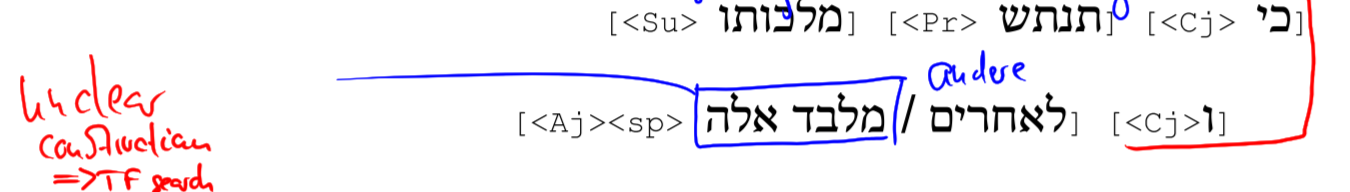

A literal translation would result in something like "and for others besides these". But as the following query shows, this is an unexpected construction appears only in Dan 11:4.

In [13]:
BesidesThese='''
clause
        w1:word lex=BD/
        w2:word sp=prde
w1 <: w2
'''
BesidesThese  = A.search(BesidesThese)
A.table(BesidesThese, start=1, end=12, condensed=True)

  0.65s 1 result


n,p,verse,word,clause,word
1,Daniel 11:4,וּכְעָמְדֹו֙ תִּשָּׁבֵ֣ר מַלְכוּתֹ֔ו וְתֵחָ֕ץ לְאַרְבַּ֖ע רוּחֹ֣ות הַשָּׁמָ֑יִם וְלֹ֣א לְאַחֲרִיתֹ֗ו וְלֹ֤א כְמָשְׁלֹו֙ אֲשֶׁ֣ר מָשָׁ֔ל כִּ֤י תִנָּתֵשׁ֙ מַלְכוּתֹ֔ו וְלַאֲחֵרִ֖ים מִלְּבַד־אֵֽלֶּה׃,אֵֽלֶּה׃,וְלַאֲחֵרִ֖ים מִלְּבַד־אֵֽלֶּה׃,בַד־


We then have two issues:
1. Who is referred to by the demonstrative pronoun אֵֽלֶּה ("these")?
2. What predicate needs to be assumed for the elliptic clause?

#### Results and Suggestions
1. Lets first tackle the second issue: From a text-syntactical perspective the missing predicate is וְתֵחָ֕ץ:
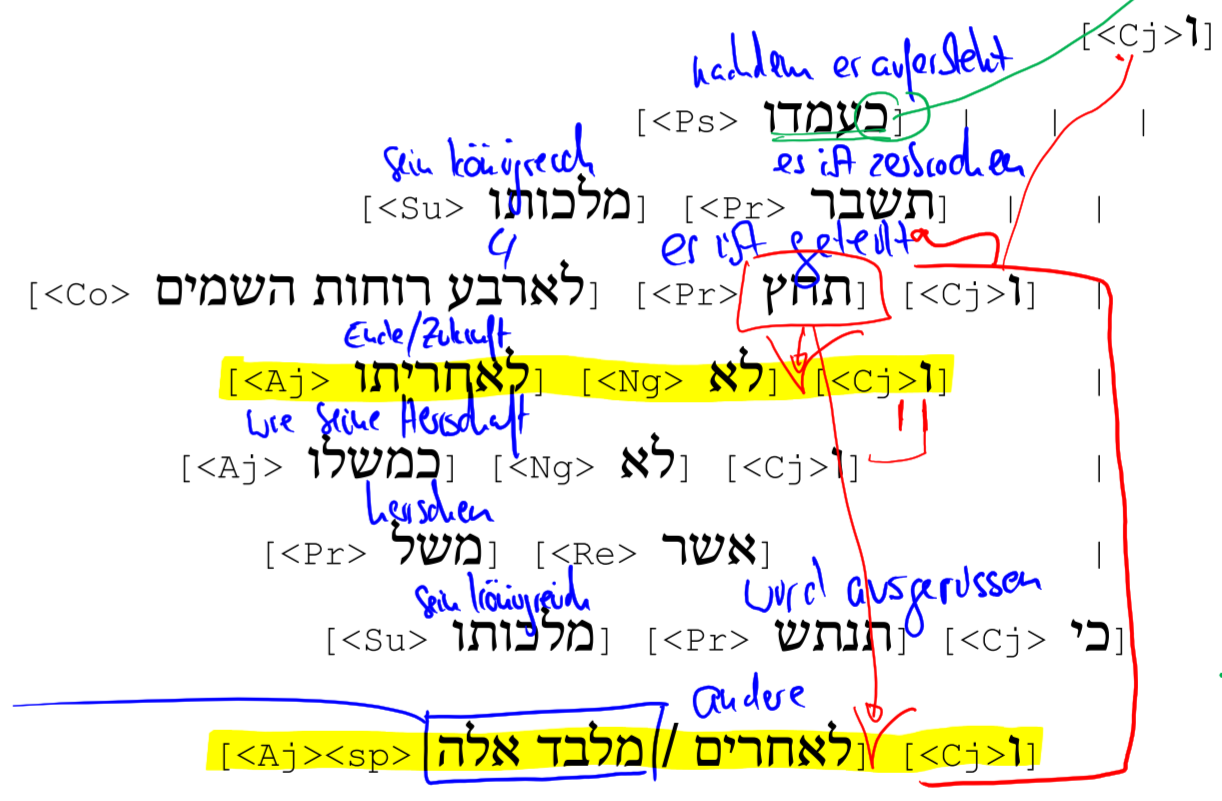
This is clear since the previous elliptic clause (וְלֹ֣א לְאַחֲרִיתֹ֗ו) has exactly the same structre (both elliptic clauses are highlighted in yellow). Tihs would render the following translation:

    **Ellipsis no1: And not for his ends/future      [are they divided].**

    **Ellipsis no2: And/But for others besides these [are they divided].**

     The challenge with such rendering is that it assumes a double PP construction with L => **חצה <Pred> + L-PP <Compl> + L-PP <Adj>** . This should render something like "to divide into X (first L-PP) on behalf of Y (second L-PP). However, such a construction is nowhere found except in Dan 11:4 as the query below shows: 

In [5]:
DivideForSomebody='''
clause
    phrase function=Pred
        w0:word lex=XYH[
    phrase typ=PP
        w1:word lex=L
        w2:word
w1 <: w2
'''
DivideForSomebody  = A.search(DivideForSomebody)
A.table(DivideForSomebody, start=1, end=12, condensed=True)

  4.52s 3 results


n,p,verse,word,phrase,clause,word,word,phrase
1,Genesis 32:8,וַיִּירָ֧א יַעֲקֹ֛ב מְאֹ֖ד וַיֵּ֣צֶר לֹ֑ו וַיַּ֜חַץ אֶת־הָעָ֣ם אֲשֶׁר־אִתֹּ֗ו וְאֶת־הַצֹּ֧אן וְאֶת־הַבָּקָ֛ר וְהַגְּמַלִּ֖ים לִשְׁנֵ֥י מַחֲנֹֽות׃,יַּ֜חַץ,לִשְׁנֵ֥י מַחֲנֹֽות׃,וַיַּ֜חַץ אֶת־הָעָ֣ם וְאֶת־הַצֹּ֧אן וְאֶת־הַבָּקָ֛ר וְהַגְּמַלִּ֖ים לִשְׁנֵ֥י מַחֲנֹֽות׃,לִ,שְׁנֵ֥י,יַּ֜חַץ
2,Ezekiel 37:22,וְעָשִׂ֣יתִי אֹ֠תָם לְגֹ֨וי אֶחָ֤ד בָּאָ֨רֶץ֙ בְּהָרֵ֣י יִשְׂרָאֵ֔ל וּמֶ֧לֶךְ אֶחָ֛ד יִֽהְיֶ֥ה לְכֻלָּ֖ם לְמֶ֑לֶךְ וְלֹ֤א יִֽהְיוּ־עֹוד֙ לִשְׁנֵ֣י גֹויִ֔ם וְלֹ֨א יֵחָ֥צוּ עֹ֛וד לִשְׁתֵּ֥י מַמְלָכֹ֖ות עֹֽוד׃,יֵחָ֥צוּ,וְלֹ֨א יֵחָ֥צוּ עֹ֛וד לִשְׁתֵּ֥י מַמְלָכֹ֖ות עֹֽוד׃,לִשְׁתֵּ֥י מַמְלָכֹ֖ות,יֵחָ֥צוּ,לִ,שְׁתֵּ֥י
3,Daniel 11:4,וּכְעָמְדֹו֙ תִּשָּׁבֵ֣ר מַלְכוּתֹ֔ו וְתֵחָ֕ץ לְאַרְבַּ֖ע רוּחֹ֣ות הַשָּׁמָ֑יִם וְלֹ֣א לְאַחֲרִיתֹ֗ו וְלֹ֤א כְמָשְׁלֹו֙ אֲשֶׁ֣ר מָשָׁ֔ל כִּ֤י תִנָּתֵשׁ֙ מַלְכוּתֹ֔ו וְלַאֲחֵרִ֖ים מִלְּבַד־אֵֽלֶּה׃,תֵחָ֕ץ,לְאַרְבַּ֖ע רוּחֹ֣ות הַשָּׁמָ֑יִם,תֵחָ֕ץ,לְ,אַרְבַּ֖ע,וְתֵחָ֕ץ לְאַרְבַּ֖ע רוּחֹ֣ות הַשָּׁמָ֑יִם


2. With regard to the first issue the second is informative: Lets first start with the textual traditions available: Theodotian follows the MT the closet and renders similarly unclear **ὅτι ἐκτιλήσεται ἡ βασιλεία αὐτοῦ καὶ ἑτέροις ἐκτὸς τούτων.** ([Rahlfs alternate](https://ref.ly/logosres/lxxsesbalt?ref=BibleLXX.Da11.4&off=237&ctx=%CE%BF%CC%94%CC%81%CF%84%CE%B9+%CE%B5%CC%93%CE%BA%CF%84%CE%B9%CE%BB%CE%B7%CC%81%CF%83%CE%B5%CF%84%CE%B1%CE%B9+~%CE%B7%CC%94+%CE%B2%CE%B1%CF%83%CE%B9%CE%BB%CE%B5%CE%B9%CC%81%CE%B1+%CE%B1%CF%85%CC%93%CF%84%CE%BF%CF%85%CD%82)) => "because his kingdom will be uprooted and for others besides these [?it is?]". 
Both the GT-Theodotian as well as the MT have the demonstrative pronoun underdetermined. The question thus is: **Who are "these"?** We unfortunatelly miss matching Qumran fragments to shed more light on this issue. 

    But when relating both elliptic clauses with each other it can be suggested that the demonstrative pronoun אֵֽלֶּה refers to לְאַחֲרִיתֹ֗ו. This would mean that the divided kingdom is given to others besides his own future (לְאַחֲרִיתֹ֗ו). Thus the plural אֵֽלֶּה could refer to the potential semantic plural assumed with לְאַחֲרִיתֹ֗ו. Most Bible translations seem to follow such reasoning (check UBS translation notes!). 

# Dan 11:5
## Linguistic Challenges
### clause no19
#### unexected Waw-Conjunction in front of a MN PP phrase
The initial clause of v5 includes a weird conjunction phrase at the end of the clause:
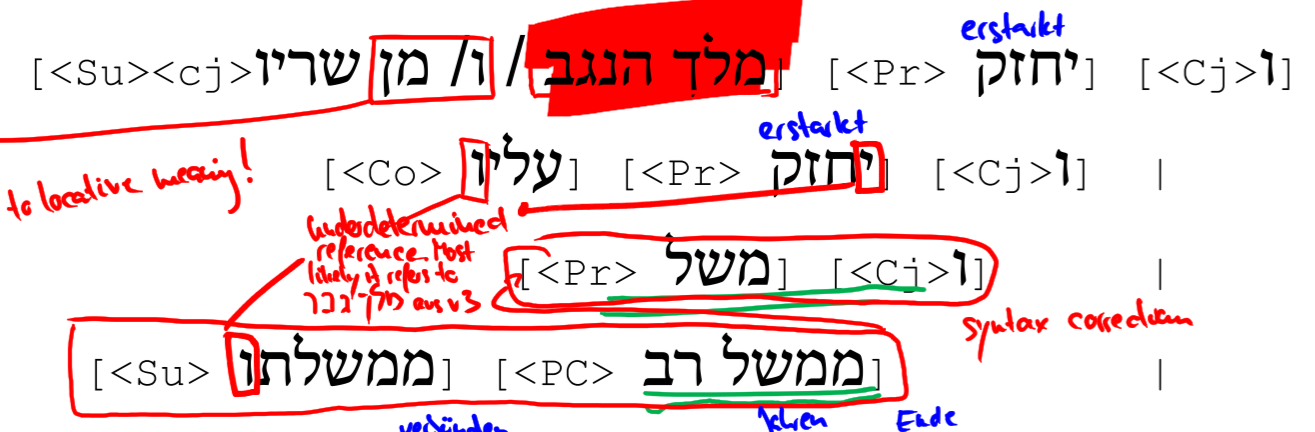

In Hebrew a W-MN construction appears only when it was preceded by a MN construction in the same phrase. For example: "[He][took][*from* the wine *and from* the cake]". That this is the rule can be quickly seen by the results of the following query. 249x a W-MN construction is  part of a larger phrase that is goverend by an initial MN preposition:

In [17]:
WawMinSubphrase='''
clause
    p1:phrase
        w0:word lex=MN
        w1:word lex=W
        w2:word lex=MN
p1 =: w0
w0 < w1
w1 <: w2
'''
WawMinSubphrase  = A.search(WawMinSubphrase)
A.table(WawMinSubphrase, start=1, end=5, condensed=False, colorMap={2: 'magenta', 3: 'cyan', 4: 'yellow', 5: 'yellow', 6: 'yellow'})

  1.38s 249 results


n,p,clause,phrase,word,word,word
1,Genesis 3:14,אָר֤וּר אַתָּה֙ מִכָּל־הַבְּהֵמָ֔ה וּמִכֹּ֖ל חַיַּ֣ת הַשָּׂדֶ֑ה,מִכָּל־הַבְּהֵמָ֔ה וּמִכֹּ֖ל חַיַּ֣ת הַשָּׂדֶ֑ה,מִ,וּ,מִ
2,Genesis 4:4,וְהֶ֨בֶל הֵבִ֥יא גַם־ה֛וּא מִבְּכֹרֹ֥ות צֹאנֹ֖ו וּמֵֽחֶלְבֵהֶ֑ן,מִבְּכֹרֹ֥ות צֹאנֹ֖ו וּמֵֽחֶלְבֵהֶ֑ן,מִ,וּ,מֵֽ
3,Genesis 5:29,זֶ֞֠ה יְנַחֲמֵ֤נוּ מִֽמַּעֲשֵׂ֨נוּ֙ וּמֵעִצְּבֹ֣ון יָדֵ֔ינוּ מִן־הָ֣אֲדָמָ֔ה,מִֽמַּעֲשֵׂ֨נוּ֙ וּמֵעִצְּבֹ֣ון יָדֵ֔ינוּ,מִֽ,וּ,מֵ
4,Genesis 6:14,וְכָֽפַרְתָּ֥ אֹתָ֛הּ מִבַּ֥יִת וּמִח֖וּץ בַּכֹּֽפֶר׃,מִבַּ֥יִת וּמִח֖וּץ,מִ,וּ,מִ
5,Genesis 6:20,מֵהָעֹ֣וף לְמִינֵ֗הוּ וּמִן־הַבְּהֵמָה֙ לְמִינָ֔הּ מִכֹּ֛ל רֶ֥מֶשׂ הָֽאֲדָמָ֖ה לְמִינֵ֑הוּ,מֵהָעֹ֣וף לְמִינֵ֗הוּ וּמִן־הַבְּהֵמָה֙ לְמִינָ֔הּ מִכֹּ֛ל רֶ֥מֶשׂ הָֽאֲדָמָ֖ה לְמִינֵ֑הוּ,מֵ,וּ,מִן־


Whenever there is a W-MN construction appearing in a clause it is ALWAYS preceided by a MN (sub)phrase. Also Daniel knows this rule and applies it several times (Dan 1:3, 5, 8:10, 9:5, 11:44):

In [88]:
WawMinNormalInDaniel='''
book book=Daniel
  clause
    p1:phrase
        w0:word lex=MN
        w1:word lex=W
        w2:word lex=MN
p1 =: w0
w0 < w1
w1 <: w2
'''
WawMinNormalInDaniel  = A.search(WawMinNormalInDaniel)
A.table(WawMinNormalInDaniel, start=1, end=20, condensed=False, colorMap={3:'magenta', 4:'cyan', 5:'yellow', 6:'yellow'})

  1.81s 6 results


n,p,book,clause,phrase,word,word,word
1,Daniel 1:3,,לְהָבִ֞יא מִבְּנֵ֧י יִשְׂרָאֵ֛ל וּמִזֶּ֥רַע הַמְּלוּכָ֖ה וּמִן־הַֽפַּרְתְּמִֽים׃,מִבְּנֵ֧י יִשְׂרָאֵ֛ל וּמִזֶּ֥רַע הַמְּלוּכָ֖ה וּמִן־הַֽפַּרְתְּמִֽים׃,מִ,וּ,מִ
2,Daniel 1:3,,לְהָבִ֞יא מִבְּנֵ֧י יִשְׂרָאֵ֛ל וּמִזֶּ֥רַע הַמְּלוּכָ֖ה וּמִן־הַֽפַּרְתְּמִֽים׃,מִבְּנֵ֧י יִשְׂרָאֵ֛ל וּמִזֶּ֥רַע הַמְּלוּכָ֖ה וּמִן־הַֽפַּרְתְּמִֽים׃,מִ,וּ,מִן־
3,Daniel 1:5,,וַיְמַן֩ לָהֶ֨ם הַמֶּ֜לֶךְ דְּבַר־יֹ֣ום בְּיֹומֹ֗ו מִפַּת־בַּ֤ג הַמֶּ֨לֶךְ֙ וּמִיֵּ֣ין מִשְׁתָּ֔יו,מִפַּת־בַּ֤ג הַמֶּ֨לֶךְ֙ וּמִיֵּ֣ין מִשְׁתָּ֔יו,מִ,וּ,מִ
4,Daniel 8:10,,וַתַּפֵּ֥ל אַ֛רְצָה מִן־הַצָּבָ֥א וּמִן־הַכֹּוכָבִ֖ים,מִן־הַצָּבָ֥א וּמִן־הַכֹּוכָבִ֖ים,מִן־,וּ,מִן־
5,Daniel 9:5,,וְסֹ֥ור מִמִּצְוֹתֶ֖ךָ וּמִמִּשְׁפָּטֶֽיךָ׃,מִמִּצְוֹתֶ֖ךָ וּמִמִּשְׁפָּטֶֽיךָ׃,מִ,וּ,מִ
6,Daniel 11:44,,וּשְׁמֻעֹ֣ות יְבַהֲלֻ֔הוּ מִמִּזְרָ֖ח וּמִצָּפֹ֑ון,מִמִּזְרָ֖ח וּמִצָּפֹ֑ון,מִ,וּ,מִ


The only cases that deviate from this rule are found by the query below. It is the TF version of the following SHEBANQ query:

```
select all objects where
[clause
  [phrase FOCUS
    [word FIRST lex<>"MN"]
    [word lex<>"MN"]*{0-50} 
    [word lex="W"]
    [word lex="MN"]
  ]
]
```
([SHEBANQ results here](https://shebanq.ancient-data.org/hebrew/query?version=2017&id=3650))

In [18]:
WawMinExcludingMine='''
clause
    p1:phrase
    /without/
       w0:word lex=MN
       w1:word lex=W
       w2:word lex=MN
       w0 < w1
       w1 <: w2
    /-/
        w1:word lex=W
        w2:word lex=MN
        w1 <: w2
'''
WawMinExcludingMine  = A.search(WawMinExcludingMine)
A.table(WawMinExcludingMine, start=1, end=15, condensed=False, colorMap={2: 'magenta', 3: 'cyan', 4: 'yellow', 5: 'yellow', 6: 'yellow'})

  2.24s 8 results


n,p,clause,phrase,word,word
1,Joshua 12:3,וְהָעֲרָבָה֩ עַד־יָ֨ם כִּנְרֹ֜ות מִזְרָ֗חָה וְ֠עַד יָ֣ם הָעֲרָבָ֤ה יָם־הַמֶּ֨לַח֙ מִזְרָ֔חָה דֶּ֖רֶךְ בֵּ֣ית הַיְשִׁמֹ֑ות וּמִ֨תֵּימָ֔ן תַּ֖חַת אַשְׁדֹּ֥ות הַפִּסְגָּֽה׃,הָעֲרָבָה֩ עַד־יָ֨ם כִּנְרֹ֜ות מִזְרָ֗חָה וְ֠עַד יָ֣ם הָעֲרָבָ֤ה יָם־הַמֶּ֨לַח֙ מִזְרָ֔חָה דֶּ֖רֶךְ בֵּ֣ית הַיְשִׁמֹ֑ות וּמִ֨תֵּימָ֔ן תַּ֖חַת אַשְׁדֹּ֥ות הַפִּסְגָּֽה׃,וּ,מִ֨
2,2_Samuel 11:12,וַיֵּ֨שֶׁב אוּרִיָּ֧ה בִירוּשָׁלִַ֛ם בַּיֹּ֥ום הַה֖וּא וּמִֽמָּחֳרָֽת׃,בַּיֹּ֥ום הַה֖וּא וּמִֽמָּחֳרָֽת׃,וּ,מִֽ
3,Jeremiah 40:7,וְכִ֣י׀ הִפְקִ֣יד אִתֹּ֗ו אֲנָשִׁ֤ים וְנָשִׁים֙ וָטָ֔ף וּמִדַּלַּ֣ת הָאָ֔רֶץ,אֲנָשִׁ֤ים וְנָשִׁים֙ וָטָ֔ף וּמִדַּלַּ֣ת הָאָ֔רֶץ,וּ,מִ
4,Daniel 1:2,וַיִּתֵּן֩ אֲדֹנָ֨י בְּיָדֹ֜ו אֶת־יְהֹויָקִ֣ים מֶֽלֶךְ־יְהוּדָ֗ה וּמִקְצָת֙ כְּלֵ֣י בֵית־הָֽאֱלֹהִ֔ים,אֶת־יְהֹויָקִ֣ים מֶֽלֶךְ־יְהוּדָ֗ה וּמִקְצָת֙ כְּלֵ֣י בֵית־הָֽאֱלֹהִ֔ים,וּ,מִ
5,Daniel 11:5,וְיֶחֱזַ֥ק מֶֽלֶךְ־הַנֶּ֖גֶב וּמִן־שָׂרָ֑יו,מֶֽלֶךְ־הַנֶּ֖גֶב וּמִן־שָׂרָ֑יו,וּ,מִן־
6,Ezra 2:70,וַיֵּשְׁב֣וּ הַכֹּהֲנִ֣ים וְ֠הַלְוִיִּם וּֽמִן־הָעָ֞ם וְהַמְשֹׁרְרִ֧ים וְהַשֹּׁועֲרִ֛ים וְהַנְּתִינִ֖ים בְּעָרֵיהֶ֑ם,הַכֹּהֲנִ֣ים וְ֠הַלְוִיִּם וּֽמִן־הָעָ֞ם וְהַמְשֹׁרְרִ֧ים וְהַשֹּׁועֲרִ֛ים וְהַנְּתִינִ֖ים,וּֽ,מִן־
7,Ezra 10:9,מַרְעִידִ֥ים עַל־הַדָּבָ֖ר וּמֵהַגְּשָׁמִֽים׃ פ,עַל־הַדָּבָ֖ר וּמֵהַגְּשָׁמִֽים׃ פ,וּ,מֵ
8,Nehemiah 7:72,וַיֵּשְׁב֣וּ הַכֹּהֲנִ֣ים וְהַלְוִיִּ֡ם וְהַשֹּׁועֲרִים֩ וְהַמְשֹׁרְרִ֨ים וּמִן־הָעָ֧ם וְהַנְּתִינִ֛ים וְכָל־יִשְׂרָאֵ֖ל בְּעָרֵיהֶ֑ם,הַכֹּהֲנִ֣ים וְהַלְוִיִּ֡ם וְהַשֹּׁועֲרִים֩ וְהַמְשֹׁרְרִ֨ים וּמִן־הָעָ֧ם וְהַנְּתִינִ֛ים וְכָל־יִשְׂרָאֵ֖ל,וּ,מִן־


The case found in Jos 12:3 can be disregarded as it follows a normal pattern in the context of semantics (MN is part of a location definition).

However, 2 Sam 11:12, Jer 40:7, Dan 1:2, Dan 11:5, Ezra 2:70, 10:9, and Neh 7:72 resemble exceptions. COnsidering the dating of the books (with the exception of 2 Sam 11:12) the suggestion can be made, that this exception characterizes (post)exilic Hebrew. In these cases the W-MN construction extends a phrase and is part of a sequence of listed items. It should be rendered as "and some of (W-MN) X".

##### Preliminary Conclusion
This would mean that we would have to render the first clause in Dan 11:5 as "And it gained strength the king of the south and [some|one] of his princes"


If we do not judge the W-MN construction as being erroneous since it does not obey the standard rules of classical and transitional Hebrew we could still work with the hypothesis that Daniel's Hebrew reflects some sort of exilic Hebrew that developed its own rules (influenced by the languages surrounding the exiles). Such assumptions would allow for two suggestions (each would need to be back up by data of course):
1. The construction extends as a subphrase the subject phrase resulting in the following translation: "And it got mighty the king of the south and [some|one] from his princes".
2. The construction could resemble the head of a new phrase (e.g. complement or adjunct phrase). In such a case the preposition MN would function comparatively as חזק is not a verb of movement, resulting in the following translation: "And it got mighty the king of the south and [that] in comparison to his princes"


The second suggestion cannot be backed up by data (yet) and assumes that Daniel does significantly deviate from standard rules of classical and transitional Biblical Hebrew. The first suggestion could be backed up with a small amount of similar cases (see above). 
In both cases, however, we assume that Daniel deviates from classical Biblical Hebrew. If such assumption is not made we must conclude that the Hebrew of Daniel is broken or at least erroneous. This seems to be the conclusion of the versions. They seem to judge that the וּמִן־שָׂרָ֑יו construction is not wrong but the following verbal phrase וְיֶחֱזַ֤ק. In Hebrew וְיֶחֱזַ֤ק functions always as a clause opener. WHen removing the W attached to וְיֶחֱזַ֤ק the construction וּמִן־שָׂרָ֑יו can become a clause opener and function as the subject of the predicate phrase יֶחֱזַ֤ק. The new clause would be: וּמִן־שָׂרָ֑יו יֶחֱזַ֤ק עָלָיו֙ resulting in something like “and [one] from his princes gains strength over him”. This is the way the versions solve the problem. The Old Greek solves the issue simply by deleting the W attached to the following verb וְיֶחֱזַ֤ק. In this way וּמִן־שָׂרָ֑יו is a clause starter (καὶ εἷς ἐκ τῶν δυναστῶν κατισχύσει αὐτὸν  => וּמִן־שָׂרָ֑יו יֶחֱזַ֤ק עָלָיו֙ instead of וְיֶחֱזַ֥ק מֶֽלֶךְ־הַנֶּ֖גֶב וּמִן־שָׂרָ֑יו וְיֶחֱזַ֤ק עָלָיו֙) and renders the translation “and  one from the rulers overpowers him”. In a similar way the Theodotian version solves the problem by ignoring the W of וְיֶחֱזַ֤ק (καὶ εἷς τῶν ἀρχόντων αὐτοῦ ἐνισχύσει ἐπʼ αὐτὸν => “and one of his commanders prevails over him”).  Most modern translations deviate from the Hebrew and follow the GT. The German Elberfelder, however, seeks to stay close to the Hebrew by taking וּמִן־שָׂרָ֑יו as a separate elliptic clause rendering “Und der König des Südens wird mächtig werden, aber <auch einer> von seinen Obersten, und der wird mächtig sein über ihn hinaus und wird herrschen, seine Herrschaft wird eine große Herrschaft sein.” ([Logos link](https://ref.ly/logosres/elbrev?ref=BibleELBER.Da11.5&off=4&ctx=hlu%C3%9F+von+jenen.%0a++5+~Und+der+K%C3%B6nig+des+S%C3%BC)). The result of Elberfelder's rendering is, however, that it also adopts the referential underdetermination found in the MT.

#### underdetermined referentially with וְיֶחֱזַ֤ק, עָלָיו֙, וּמָשָׁ֔ל, מֶמְשַׁלְתֹּֽו
To whom the 3sgM references in וְיֶחֱזַ֤ק, עָלָיו֙, וּמָשָׁ֔ל, מֶמְשַׁלְתֹּֽו refer to cannot be decided without solving the previous problem. Three options can be thought of>
1. If indeed וּמִן־שָׂרָ֑יו functions as clause opener (against all rules of classical Hebrew) and functions as a subject of יֶחֱזַ֤ק (by deleting the W) then the 3sgM suffix in עָלָיו֙ would refer to the king of the south (מֶֽלֶךְ־הַנֶּ֖גֶב): **One of the princes of the king of the south overrules the king of the south (וּמִן־שָׂרָ֑יו יֶחֱזַ֤ק עָלָיו֙)**. 

However, if וּמִן־שָׂרָ֑יו is considered to be a subphrase of the subject phrase in the previous clause וְיֶחֱזַ֥ק מֶֽלֶךְ־הַנֶּ֖גֶב וּמִן־שָׂרָ֑יו two different scenarios develop for the identification of the 3sgM references that show after וּמִן־שָׂרָ֑יו:

2. If one renders "And it got strong the king of the south and [some|one] of his princes. And he got strong over him (עָלָיו֙)." it remains ambiguous who is referred to by the suffix. Usually the explicitly introduced subject (the king of the south in וְיֶחֱזַ֥ק מֶֽלֶךְ־הַנֶּ֖גֶב) is the assumed subject for the following clauses that do not contain an explicit subject phrase). However, if we assume a complex subject phrase "the king of the south and [some|one] from his princes" the referentiality of עָלָיו֙ remains *syntactically* underdetermined (I will incorporate the *text-syntactical* dimension in my preliminary conclusion). 

3. If one renders "And it got strong the king of the south and [this] over his princes. And he got strong over him (עָלָיו֙)." the king of the south would be the subject of the second clause (And the king of the south go strong over him). However, the singular suffix of עָלָיו֙ would not match the plural state of the previously mentioned princes (שָׂרָ֑יו). Rather one would expect "And the king of the south got strong over them (עֲלֵיהֶם)".

Again, suggestion 2+3 assume that Daniel's Hebrew is not erroneous. Such an assumption is, however, only backed up with some data for suggestion no2 (see above). 

If data can be found that would support that in exilic Hebrew the construction W-MN as head of a phrase and W-VerbalForm (in this case WYiqtol) as an inside-of-a-clause phrase (instead of a clause opener) is possible **AND** if the MN construction can render "one of/one from" instead of just "from" then suggestion no1 is feasible (see the rendering of no2). A lot of ifs though...

Unfortunately, there are not Qumran texts that reproduce Dan 11:5...

##### Preliminary Conclusion
I do not like to fix the Hebrew text or assume its erroneous nature without solid grammatical arguments. Therefore, I would give preference to the second suggested rendering above. Such a rendering can also be supported by data (although not too much). This means I will regard וּמִן־שָׂרָ֑יו as an extension of the subject phrase in וְיֶחֱזַ֥ק מֶֽלֶךְ־הַנֶּ֖גֶב וּמִן־שָׂרָ֑יו: "And it gained strength the king of the south and [one] of his princes". This also means that I regard the following וְיֶחֱזַ֥ק as a clause opener as this is always the case in Hebrew. We then have two 3sgM participants: (1) king of the south; (2) one of the princes of the king of the south. 

Because of the text-syntactical structure and knowing that the head of complex subject-phrases (in our cases "king of the south") is more dominant than the remaining elements of the complex subject phrase (in our case "and [one] of his princes") I would argue that the implied subject of the following predicates is the king of the south while the other 3sgM reference implies one of the princes of the king of the south. 

This would result in the following translation of v5:

cl1: **And it gains strength the king of the south and one of his princes.**

cl2: **And he (i.e. the king of the south) gains strength over him (one of the king's princes)**

cl3: **And he (i.e. the king of the south) rules.**

cl4: **Of great rule is his (i.e. the king of the south) rulership.**

If this verse is read historically it would mean that the king of the south must have been in an inner political struggle with one of his princes but was able to overcome the challenge.


# Dan 11:6

If a conflict can be assumed between the king of the south and one of his princes, the initial clause of v6

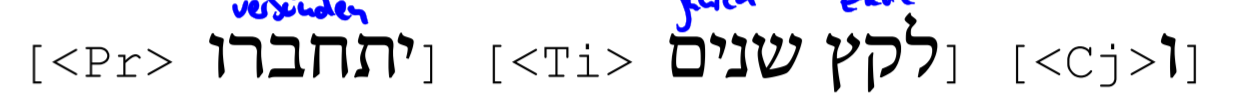

should have these two antagonists assumed as subjects of יִתְחַבָּ֔רוּ. This would mean that the king of the south and one of his princes are resolving their enmity with a covenant. Some translations connect this first clause with the second clause ("and the daughter of the king of the south...") as part of one paragraph. However, such a connection would not be allowed by classical Hebrew text-syntax rules. Instead the second clause with explicit introduction of the daughter of the king of the south as subject would initiate as completely new paragraph. Again, such reading would assume that Daniel follows the rules of classical Biblical Hebrew.

While the construction "to do fairness" is grammatically correct it is an unknown combination of words and might indicate that Daniel's Hebrew is of a specific nature...

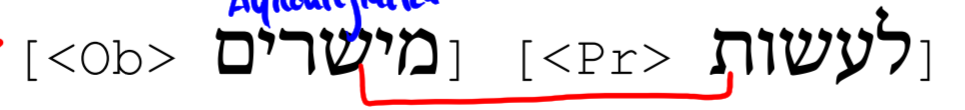

See the query below:

In [21]:
DoingUprightness='''
clause
    phrase
        word lex=<FH[
    phrase
        word lex=MJCRJM/
'''
DoingUprightness  = A.search(DoingUprightness)
A.table(DoingUprightness, start=1, end=15, condensed=False, colorMap={2: 'magenta', 3: 'cyan', 4: 'yellow', 5: 'yellow', 6: 'yellow'})

  0.99s 1 result


n,p,clause,phrase,word,phrase,word
1,Daniel 11:6,לַעֲשֹׂ֖ות מֵישָׁרִ֑ים,לַעֲשֹׂ֖ות,עֲשֹׂ֖ות,מֵישָׁרִ֑ים,מֵישָׁרִ֑ים
